In [ ]:
import pandas as pd
import numpy as np  
from datetime import date

# Charger le fichier CSV en spécifiant le séparateur point-virgule
df = pd.read_csv("Camp_Market_Brut.csv", sep=';')

print("Données chargées avec succès !")
df.head()

Données chargées avec succès !


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# --- 1. Assurer que la colonne de date est au bon format ---
# Cette ligne est importante pour le calcul de l'ancienneté.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# --- 2. Création des nouvelles colonnes ---

# Age: Calcul de l'âge du client en 2025
df['Age'] = 2025 - df['Year_Birth']

# TotalSpent: Somme de toutes les dépenses (colonnes Mnt*)
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[mnt_columns].sum(axis=1)

# TotalPurchases: Somme de tous les achats (colonnes Num*Purchases)
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[purchase_columns].sum(axis=1)

# TotalKids: Somme des enfants et des adolescents
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

# AccentedCmp_total: Total des campagnes marketing acceptées
cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['AcceptedCmp_total'] = df[cmp_columns].sum(axis=1)

# AvgSpentPerPurchase: Dépense moyenne par achat
df['AvgSpentPerPurchase'] = (df['TotalSpent'] / df['TotalPurchases'])

# Ces lignes fonctionneront maintenant sans erreur
df['AvgSpentPerPurchase'].replace([np.inf, -np.inf], 0, inplace=True)
df['AvgSpentPerPurchase'] = df['AvgSpentPerPurchase'].fillna(0)


# DaySinceCustomer: Ancienneté du client en jours jusqu'au 15/10/2025
date_reference = pd.to_datetime("2025-10-15")
df['DaySinceCustomer'] = (date_reference - df['Dt_Customer']).dt.days

# --- 3. AffichAge du résultat ---
print("✅ Les nouvelles colonnes ont été ajoutées avec succès !")

# On sélectionne quelques nouvelles colonnes avec des colonnes originales pour vérifier
display(df[['ID', 'Year_Birth', 'Age', 'TotalSpent', 'TotalPurchases', 'AvgSpentPerPurchase', 'Dt_Customer', 'DaySinceCustomer']].head())

✅ Les nouvelles colonnes ont été ajoutées avec succès !


C:\Users\alexa\AppData\Local\Temp\ipykernel_780\4099009302.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AvgSpentPerPurchase'].replace([np.inf, -np.inf], 0, inplace=True)


,ID,Year_Birth,Age,TotalSpent,TotalPurchases,AvgSpentPerPurchase,Dt_Customer,DaySinceCustomer
0,5524,1957,68,1617,25,64.680000,2012-09-04,4789
1,2174,1954,71,27,6,4.500000,2014-03-08,4239
2,4141,1965,60,776,21,36.952381,2013-08-21,4438
3,6182,1984,41,53,8,6.625000,2014-02-10,4265
4,5324,1981,44,422,19,22.210526,2014-01-19,4287


In [ ]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Z_CostContact', 'Z_Revenue']

# Suppression des colonnes du DataFrame
df.drop(columns=colonnes_a_supprimer, inplace=True)

print("✅ Colonnes 'Z_CostContact' et 'Z_Revenue' supprimées avec succès.")

# Affichage des premières lignes pour vérifier que les colonnes ont bien disparu
display(df.head())

✅ Colonnes 'Z_CostContact' et 'Z_Revenue' supprimées avec succès.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Age,TotalSpent,TotalPurchases,TotalKids,AcceptedCmp_total,AvgSpentPerPurchase,DaySinceCustomer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,68,1617,25,0,1,64.680000,4789
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,71,27,6,2,0,4.500000,4239
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,60,776,21,0,0,36.952381,4438
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,41,53,8,1,0,6.625000,4265
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,44,422,19,1,0,22.210526,4287


In [ ]:
# 1. Calculer les statistiques de base
# .describe(include='all') inclut aussi les colonnes non-numériques
# .T (ou .transpose()) inverse le tableau pour avoir les colonnes en lignes, ce qui est plus facile à lire
stats_base = df.describe().T

# 2. Créer un DataFrame pour les informations supplémentaires
stats_perso = pd.DataFrame({
    'Type': df.dtypes,
    'Valeurs Nulles': df.isnull().sum()
})

# 3. Fusionner les deux tableaux
# On fusionne le tableau personnalisé avec les statistiques de base
# 'left' assure que toutes nos colonnes sont conservées
# 'left_index=True' et 'right_index=True' fusionnent les tableaux sur les noms des colonnes
summary_table = stats_perso.join(stats_base)

print("📊 Voici un résumé statistique complet de vos données :")
display(summary_table)

📊 Voici un résumé statistique complet de vos données :


,Type,Valeurs Nulles,count,mean,min,25%,50%,75%,max,std
ID,int64,0,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,int64,0,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,float64,24,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,int64,0,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,int64,0,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,datetime64[ns],0,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,int64,0,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,int64,0,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


📦 Visualisation des valeurs aberrantes pour les colonnes clés :



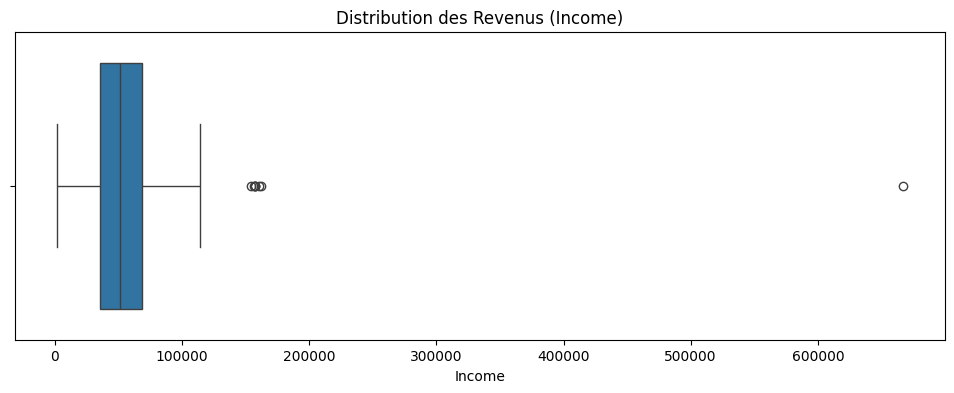

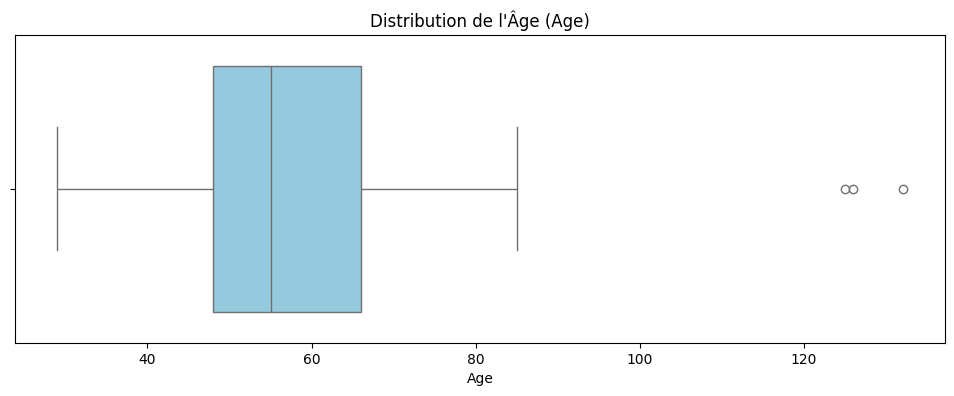

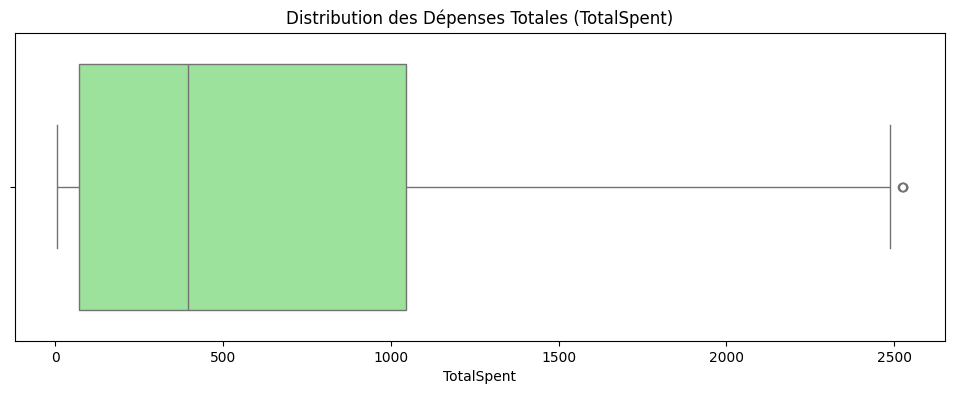

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("📦 Visualisation des valeurs aberrantes pour les colonnes clés :\n")

# --- Graphique pour le Revenu (Income) ---
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Income'])
plt.title('Distribution des Revenus (Income)')
plt.show()

# --- Graphique pour l'Âge (AGE) ---
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Distribution de l\'Âge (Age)')
plt.show()

# --- Graphique pour les Dépenses Totales (TotalSpent) ---
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['TotalSpent'], color='lightgreen')
plt.title('Distribution des Dépenses Totales (TotalSpent)')
plt.show()

In [ ]:
# Compte le nombre de valeurs nulles (NaN) spécifiquement dans la colonne 'Income'
nombre_de_nuls_income = df['Income'].isnull().sum()

print(f"🔎 Il y a {nombre_de_nuls_income} lignes avec un revenu manquant dans la colonne 'Income'.")

🔎 Il y a 24 lignes avec un revenu manquant dans la colonne 'Income'.


In [ ]:
# --- AVANT le remplacement ---
# On compte le nombre de valeurs nulles dans la colonne 'Income'
nombre_de_nuls = df['Income'].isnull().sum()
print(f"🔎 Nombre de lignes avec un revenu manquant (valeur nulle) : {nombre_de_nuls}")

# --- PENDANT le remplacement ---
# Calculer la médiane
median_income = df['Income'].median()

# Remplacer les valeurs nulles par la médiane
df['Income'] = df['Income'].fillna(median_income)
print(f"✅ {nombre_de_nuls} valeur(s) nulle(s) dans 'Income' ont été remplacée(s) par la médiane : {median_income:.0f}€.")

# --- APRÈS le remplacement (Vérification) ---
# On vérifie qu'il n'y a plus de valeurs nulles
print(f"Nombre de valeurs nulles restantes dans 'Income' : {df['Income'].isnull().sum()}")

🔎 Nombre de lignes avec un revenu manquant (valeur nulle) : 24
✅ 24 valeur(s) nulle(s) dans 'Income' ont été remplacée(s) par la médiane : 51382€.
Nombre de valeurs nulles restantes dans 'Income' : 0


In [ ]:
# --- Étape 1 : Vérifier le nombre de clients AVANT la suppression ---
lignes_avant = len(df)
print(f"🔎 Nombre de clients avant le filtre : {lignes_avant}")

# --- Étape 2 : Appliquer le filtre pour supprimer les lignes ---
# Cette ligne de code ne garde que les clients dont l'année de naissance ('Year_Birth') 
# est supérieure ou égale à 1930.
df = df[df['Year_Birth'] >= 1930]

# --- Étape 3 : Vérifier le nombre de clients APRÈS la suppression ---
lignes_apres = len(df)
print(f"✅ Nombre de clients après le filtre : {lignes_apres}")
print(f"➡️ {lignes_avant - lignes_apres} client(s) ont été supprimés.")

# --- Étape 4 : Confirmer le changement ---
# On vérifie que la nouvelle année de naissance la plus basse est bien 1930 ou plus.
print(f"Nouvelle année de naissance minimale dans le tableau : {df['Year_Birth'].min()}")

🔎 Nombre de clients avant le filtre : 2240
✅ Nombre de clients après le filtre : 2237
➡️ 3 client(s) ont été supprimés.
Nouvelle année de naissance minimale dans le tableau : 1940


In [ ]:
# 1. Calculer les statistiques de base
# .describe(include='all') inclut aussi les colonnes non-numériques
# .T (ou .transpose()) inverse le tableau pour avoir les colonnes en lignes, ce qui est plus facile à lire
stats_base = df.describe().T

# 2. Créer un DataFrame pour les informations supplémentaires
stats_perso = pd.DataFrame({
    'Type': df.dtypes,
    'Valeurs Nulles': df.isnull().sum()
})

# 3. Fusionner les deux tableaux
# On fusionne le tableau personnalisé avec les statistiques de base
# 'left' assure que toutes nos colonnes sont conservées
# 'left_index=True' et 'right_index=True' fusionnent les tableaux sur les noms des colonnes
summary_table = stats_perso.join(stats_base)

print("📊 Voici un résumé statistique complet de vos données :")
display(summary_table)

📊 Voici un résumé statistique complet de vos données :


,Type,Valeurs Nulles,count,mean,min,25%,50%,75%,max,std
ID,int64,0,2237.0,5590.726419,0.0,2829.0,5455.0,8427.0,11191.0,3245.118591
Year_Birth,int64,0,2237.0,1968.901654,1940.0,1959.0,1970.0,1977.0,1996.0,11.701917
Education,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,float64,0,2237.0,52227.407689,1730.0,35523.0,51381.5,68281.0,666666.0,25043.26683
Kidhome,int64,0,2237.0,0.444345,0.0,0.0,0.0,1.0,2.0,0.538467
Teenhome,int64,0,2237.0,0.506482,0.0,0.0,0.0,1.0,2.0,0.544593
Dt_Customer,datetime64[ns],0,2237,2013-07-10 05:01:54.260169728,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 00:00:00,2013-12-30 00:00:00,2014-06-29 00:00:00,NaN
Recency,int64,0,2237.0,49.104604,0.0,24.0,49.0,74.0,99.0,28.956073
MntWines,int64,0,2237.0,303.99553,0.0,24.0,174.0,504.0,1493.0,336.574382


In [ ]:
# Nom du fichier que vous allez créer
nom_fichier = 'Camp_Market_cleaned.csv'

# ÉTAPE AJOUTÉE : Arrondir toutes les colonnes numériques à 2 décimales
df = df.round(2)

# Exporter le DataFrame en fichier CSV
# index=False est important pour ne pas inclure l'index du DataFrame comme une colonne.
df.to_csv(nom_fichier, index=False, sep=';')

print(f"✅ Fichier '{nom_fichier}' enregistré avec succès. Toutes les colonnes numériques sont arrondies à 2 décimales.")

✅ Fichier 'Camp_Market_cleaned.csv' enregistré avec succès. Toutes les colonnes numériques sont arrondies à 2 décimales.
